In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Generowanie danych losowych z rozkładu normalnego
np.random.seed(42)
data = {
 'A': np.random.normal(5, .5, 100),
 'B': np.random.normal(0, 200, 100)
}

normal(mean, std, sample_count)

In [146]:
def histogram_for_feature(feature: str):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20, edgecolor='k')
    plt.xlabel(feature)
    plt.ylabel("Liczba probek")
    plt.title(f"Histogram {feature}")
    plt.show()

NA przed oczyszczeniem: A    1
B    1
dtype: int64
NA po oczyszczeniu: A    0
B    0
dtype: int64


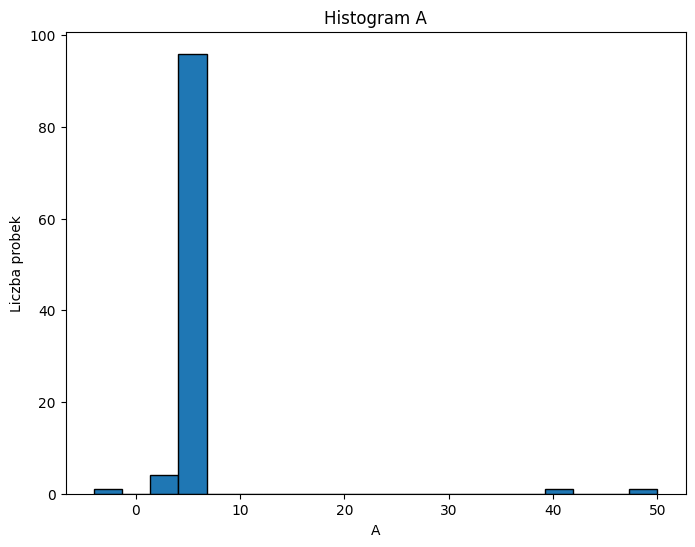

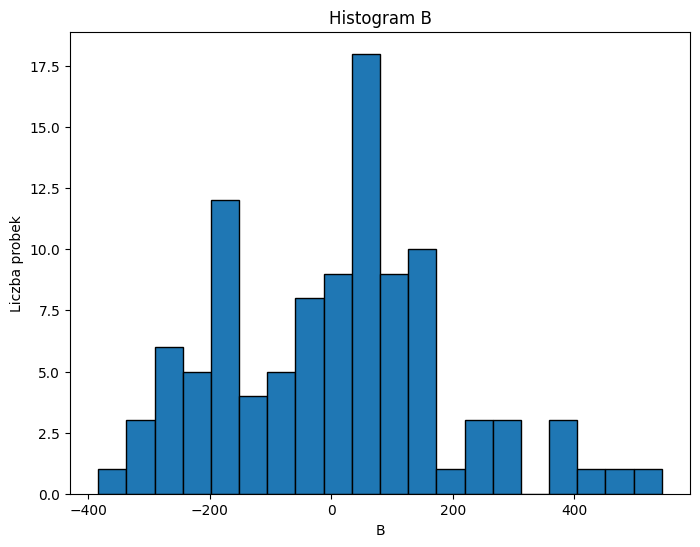

In [147]:
# Dodanie wartości odstających (outliers) do danych
outliers = [40.5, 50.0, None, -4.0]
data['A'] = np.concatenate((data['A'], outliers))
data['B'] = np.concatenate((data['B'], outliers))
# Tworzenie ramki danych
df = pd.DataFrame(data)

# Oczyszaczanie danych
print(f'NA przed oczyszczeniem: {df.isna().sum()}')
df = df.dropna()
print(f'NA po oczyszczeniu: {df.isna().sum()}')

# histogram
histogram_for_feature('A')
histogram_for_feature('B')

In [148]:
# Mean i std dla zbioru 'A'
feature = 'A'
mean = df[feature].mean()
std = df[feature].std()
print(f'Zbior {feature}. Srednia: {mean}, odchylenie standardowe {std}')
# Wszystko popuste przez wartosci mocno odstajace. Najbardziej w zbiorze 'A'

# Osie takie same przed i po standaryzacji

Zbior A. Srednia: 5.64376382650772, odchylenie standardowe 5.725969543146119


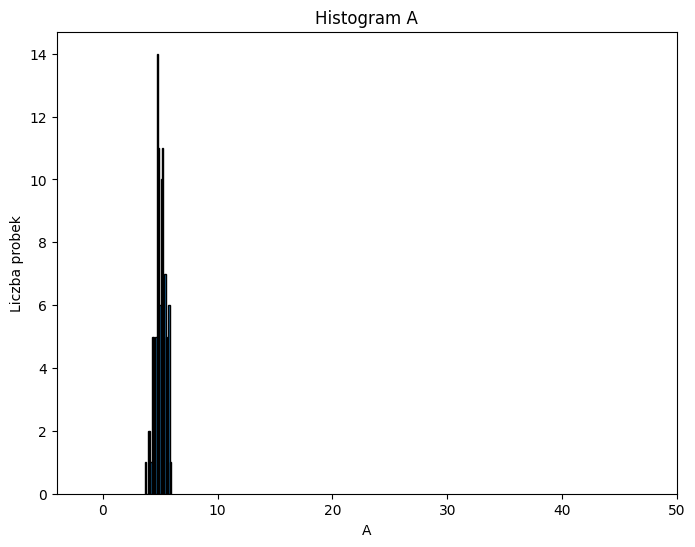

In [149]:
# Usuwanie wartosci odstajacych
mean_stab = 5
std_stab = 1/2

df = df[(mean_stab - 3 * std_stab <= df['A']) & (df['A'] <= mean + std_stab * std)]

# Histogram bez wartosci odstajacych
plt.figure(figsize=(8, 6))
plt.hist(df[feature], bins=20, edgecolor='k')
plt.xlabel(feature)
plt.ylabel("Liczba probek")
plt.title(f"Histogram {feature}")
plt.xlim(-4, 50)
plt.show()


Ćwiczenie 2
Standaryzacja danych

Scatter plot przed standaryzacja

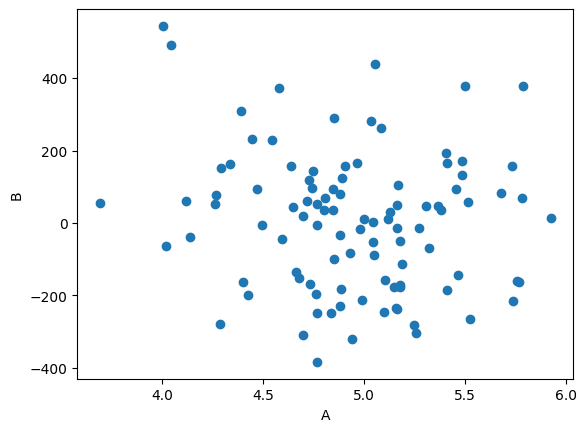

In [150]:
def create_scatter_for_features(x_feature: str, y_feature: str):
    plt.scatter(df[x_feature], df[y_feature])
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)

# plt.figure()
# plt.subplot(1, 2, 1)
create_scatter_for_features('A', 'B')


Scatter plot po standaryzacji

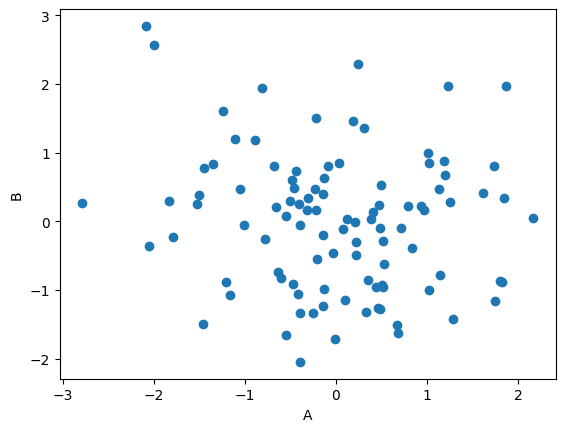

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
serieAB = ['A', 'B']
df[serieAB] = scaler.fit_transform(df[serieAB])

# plt.subplot(1, 2, 2)
create_scatter_for_features('A', 'B')
# plt.show()